Import the modules used in this project

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Set up pandas display:

In [188]:
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 15)

Import the data scraped from immoweb.

In [189]:
data = pd.read_csv(".\data\output.csv")
data.drop_duplicates("id")
data = data[data['price']>0]
display(data.head())
data["postalCode"]=data["postalCode"].astype(str)

,id,type of property,subtype of property,locality,latitude,longitude,street,province,postalCode,price,type of sale,number of bedrooms,living area,fully equipped kitchen,furnished,open fire,terrace,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building
0,10681697,HOUSE,HOUSE,Liege,50.71,5.62,Rue de la Wallonie 2A,Liège,4020,149000,residential_sale,4,14,installed,True,False,True,25.0,NaN,NaN,137.0,110.0,2.0,False,good
1,10679325,HOUSE,HOUSE,Vise,50.71,5.62,Rue de la Wallonie 2A,Liège,4600,229000,residential_sale,3,19,installed,False,False,True,136.0,NaN,NaN,145.0,184.0,3.0,False,good
2,10680063,HOUSE,BUNGALOW,ROTHEUX-RIMIÈRE,50.52,5.24,Avenue des Ardennes 1/02,Liège,4120,319000,residential_sale,2,24,installed,NaN,True,True,40.0,True,200.0,104.0,543.0,3.0,NaN,just_renovated
3,10680254,HOUSE,VILLA,La Roche-en-Ardenne,50.27,5.45,Rue Simon 46/2,Luxembourg,6980,398000,residential_sale,3,40,hyper_equipped,False,False,True,NaN,True,1193.0,170.0,1193.0,4.0,False,good
4,10679351,HOUSE,VILLA,Vilvoorde,50.89,4.47,Parklaan 59/1,Flemish Brabant,1800,430000,residential_sale,3,17,semi_equipped,False,False,True,40.0,True,400.0,132.0,623.0,3.0,False,good


In [190]:
#this code shows how messy the locality variable can be:
data[data["postalCode"]=="1000"]["locality"].value_counts()

locality
Bruxelles                231
Brussels City             63
BRUXELLES                 32
Brussels                  20
Brussel                   13
Bruxelles ville            9
Pentagone (Bruxelles)      7
Nord-Est (Bruxelles)       3
Bruxelles  1               3
Bruxelles 1                3
Nord (Bruxelles)           2
Louise (Bruxelles)         1
Pentagone (Brussel)        1
Ixelles                    1
Name: count, dtype: int64

In [191]:
# import the gemeenten en postcode info from https://www.metatopos.eu/belgcombiN.html
post_code=pd.read_excel("data\Belgiesche gemeenten met postcodes.xlsx")
post_code.head()

,Post-,Gemeente,Deelgemeente,Provincie,Inwoners,Facili-,Vertaling naam
0,code,NaN,NaN,NaN,NaN,teiten,(deel)gemeente
1,1000,Brussel,NaN,Brussels Hoofdstedelijk Gewest,178552.0,N+F,Bruxelles
2,1000,Bruxelles,NaN,Brussels Hoofdstedelijk Gewest,NaN,N+F,Brussel
3,1030,Schaarbeek,NaN,Brussels Hoofdstedelijk Gewest,132590.0,N+F,Schaerbeek
4,1030,Schaerbeek,NaN,Brussels Hoofdstedelijk Gewest,NaN,N+F,Schaarbeek


Clean up the gemeente info first:
- remove deelgemeente, inwoners, facili-, vertaling naam coloums
- drop nan
- remove the french translation
- change the type of Postalcode to int
- change Brussels Hoofdstedelijk Gewest to Brussel


In [192]:
post_code.drop(columns=['Deelgemeente','Facili-',"Inwoners",'Vertaling naam'],inplace=True)
post_code.columns = ["postalCode","Gemeente","Province"]
post_code.dropna(subset="postalCode")
post_code.drop_duplicates(subset="postalCode",keep='first',inplace =True)
post_code["Province"].replace("Brussels Hoofdstedelijk Gewest","Brussel",inplace=True)
post_code["postalCode"]=post_code["postalCode"].astype(str)

Clean the "locality" and "province" columns of data , by mapping it to the correct ones in post_code

In [193]:
#I spend a lot of time on this.
# Wrong approach: iterate through the data, assign the right value of locality from post_code["Gemeente"]
# Right way to do it: name the series in post_code with the same name, and merge two dataframes!!!
data = data.merge(post_code,how="left",on="postalCode")
data = data.drop(columns=["province"])
data

,id,type of property,subtype of property,locality,latitude,longitude,street,postalCode,price,type of sale,number of bedrooms,living area,fully equipped kitchen,furnished,open fire,terrace,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building,Gemeente,Province
0,10681697,HOUSE,HOUSE,Liege,50.71,5.62,Rue de la Wallonie 2A,4020,149000,residential_sale,4,14,installed,True,False,True,25.0,NaN,NaN,137.0,110.0,2.0,False,good,Liège,Liège
1,10679325,HOUSE,HOUSE,Vise,50.71,5.62,Rue de la Wallonie 2A,4600,229000,residential_sale,3,19,installed,False,False,True,136.0,NaN,NaN,145.0,184.0,3.0,False,good,Visé,Liège
2,10680063,HOUSE,BUNGALOW,ROTHEUX-RIMIÈRE,50.52,5.24,Avenue des Ardennes 1/02,4120,319000,residential_sale,2,24,installed,NaN,True,True,40.0,True,200.0,104.0,543.0,3.0,NaN,just_renovated,Neupré,Liège
3,10680254,HOUSE,VILLA,La Roche-en-Ardenne,50.27,5.45,Rue Simon 46/2,6980,398000,residential_sale,3,40,hyper_equipped,False,False,True,NaN,True,1193.0,170.0,1193.0,4.0,False,good,La Roche-en-Ardenne,Luxembourg
4,10679351,HOUSE,VILLA,Vilvoorde,50.89,4.47,Parklaan 59/1,1800,430000,residential_sale,3,17,semi_equipped,False,False,True,40.0,True,400.0,132.0,623.0,3.0,False,good,Vilvoorde,Vlaams-Brabant
5,10679090,HOUSE,HOUSE,Oudenaarde,50.74,3.60,Stationstraat 30,9700,439000,residential_sale,2,21,hyper_equipped,False,False,True,25.0,True,420.0,161.0,680.0,4.0,False,as_new,Oudenaarde,Oost-Vlaanderen
6,10678835,HOUSE,HOUSE,Dilbeek,50.85,4.27,Astridlaan 1,1700,529000,residential_sale,4,29,installed,NaN,False,True,NaN,NaN,NaN,315.0,8002.0,3.0,False,to_renovate,Dilbeek,Vlaams-Brabant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16788,10408257,APARTMENT,APARTMENT,Blankenberge,51.31,3.12,Franchommelaan 90,8370,399000,residential_sale,2,0,installed,False,False,NaN,NaN,NaN,NaN,86.0,0.0,2.0,False,0,Blankenberge,West-Vlaanderen
16789,10405999,APARTMENT,APARTMENT,Leuven,50.88,4.71,Bondgenotenlaan 138,3000,471287,residential_sale,2,0,0,NaN,False,True,9.0,NaN,NaN,115.0,0.0,0.0,NaN,0,Leuven,Vlaams-Brabant


Now the cleaning of data starts
- replace NaN with the right value
- create a new dataframe for the kitchen as the original description is messy
- merge the new dataframe

In [194]:
#fill the nan with false in the following columns
for column in ["furnished","open fire","terrace","garden","swimming pool"]:
    data.loc[:,column]=data[column].fillna(False)
#fill the nan with o in the following columns:
for column in ["terrace area","garden area","total land area","number of facades"]:
    data.loc[:,column]=data[column].fillna(0)
data = data.dropna(subset=["Province",'total property area'])
data["garden"]=data["garden"].astype(bool)

#clean up kitchen discription
kitchen_dict = {"fully equipped kitchen":["usa_hyper_equipped ","hyper_equipped","usa_installed","semi_equipped","usa_semi_equipped","not_installed","usa_uninstalled",0],
                "kitchen":["Hyper equipped","Hyper equipped","Equipped","Semi equipped","Semi equipped","Not equipped","Not equipped","Not equipped"]}
kitchen_df=pd.DataFrame(kitchen_dict)
data = data.merge(kitchen_df,how="left",on="fully equipped kitchen")
print(data.shape)
display(data.head())

(15964, 27)


C:\Users\spike\AppData\Local\Temp\ipykernel_30356\4252122947.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,type of property,subtype of property,locality,latitude,longitude,street,postalCode,price,type of sale,number of bedrooms,living area,fully equipped kitchen,furnished,open fire,terrace,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building,Gemeente,Province,kitchen
0,10681697,HOUSE,HOUSE,Liege,50.71,5.62,Rue de la Wallonie 2A,4020,149000,residential_sale,4,14,installed,True,False,True,25.0,False,0.0,137.0,110.0,2.0,False,good,Liège,Liège,NaN
1,10679325,HOUSE,HOUSE,Vise,50.71,5.62,Rue de la Wallonie 2A,4600,229000,residential_sale,3,19,installed,False,False,True,136.0,False,0.0,145.0,184.0,3.0,False,good,Visé,Liège,NaN
2,10680063,HOUSE,BUNGALOW,ROTHEUX-RIMIÈRE,50.52,5.24,Avenue des Ardennes 1/02,4120,319000,residential_sale,2,24,installed,False,True,True,40.0,True,200.0,104.0,543.0,3.0,False,just_renovated,Neupré,Liège,NaN
3,10680254,HOUSE,VILLA,La Roche-en-Ardenne,50.27,5.45,Rue Simon 46/2,6980,398000,residential_sale,3,40,hyper_equipped,False,False,True,0.0,True,1193.0,170.0,1193.0,4.0,False,good,La Roche-en-Ardenne,Luxembourg,Hyper equipped
4,10679351,HOUSE,VILLA,Vilvoorde,50.89,4.47,Parklaan 59/1,1800,430000,residential_sale,3,17,semi_equipped,False,False,True,40.0,True,400.0,132.0,623.0,3.0,False,good,Vilvoorde,Vlaams-Brabant,Semi equipped


Drop the duplicates with the same coordinates, price and size:


In [195]:
#first filter out the duplicates in the list
condition = data[["latitude","longitude","street","price","total property area"]].duplicated(keep=False)
#pass the returned boolean to data, get the index of the duplicates
data = data.drop(data[condition].index)
display(data)

,id,type of property,subtype of property,locality,latitude,longitude,street,postalCode,price,type of sale,number of bedrooms,living area,fully equipped kitchen,furnished,open fire,terrace,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building,Gemeente,Province,kitchen
0,10681697,HOUSE,HOUSE,Liege,50.71,5.62,Rue de la Wallonie 2A,4020,149000,residential_sale,4,14,installed,True,False,True,25.0,False,0.0,137.0,110.0,2.0,False,good,Liège,Liège,NaN
1,10679325,HOUSE,HOUSE,Vise,50.71,5.62,Rue de la Wallonie 2A,4600,229000,residential_sale,3,19,installed,False,False,True,136.0,False,0.0,145.0,184.0,3.0,False,good,Visé,Liège,NaN
2,10680063,HOUSE,BUNGALOW,ROTHEUX-RIMIÈRE,50.52,5.24,Avenue des Ardennes 1/02,4120,319000,residential_sale,2,24,installed,False,True,True,40.0,True,200.0,104.0,543.0,3.0,False,just_renovated,Neupré,Liège,NaN
3,10680254,HOUSE,VILLA,La Roche-en-Ardenne,50.27,5.45,Rue Simon 46/2,6980,398000,residential_sale,3,40,hyper_equipped,False,False,True,0.0,True,1193.0,170.0,1193.0,4.0,False,good,La Roche-en-Ardenne,Luxembourg,Hyper equipped
4,10679351,HOUSE,VILLA,Vilvoorde,50.89,4.47,Parklaan 59/1,1800,430000,residential_sale,3,17,semi_equipped,False,False,True,40.0,True,400.0,132.0,623.0,3.0,False,good,Vilvoorde,Vlaams-Brabant,Semi equipped
5,10679090,HOUSE,HOUSE,Oudenaarde,50.74,3.60,Stationstraat 30,9700,439000,residential_sale,2,21,hyper_equipped,False,False,True,25.0,True,420.0,161.0,680.0,4.0,False,as_new,Oudenaarde,Oost-Vlaanderen,Hyper equipped
6,10678835,HOUSE,HOUSE,Dilbeek,50.85,4.27,Astridlaan 1,1700,529000,residential_sale,4,29,installed,False,False,True,0.0,False,0.0,315.0,8002.0,3.0,False,to_renovate,Dilbeek,Vlaams-Brabant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15953,9085738,APARTMENT,APARTMENT,Deerlijk,50.86,3.34,Wagenaarstraat 33,8540,283893,residential_sale,2,0,0,False,False,True,36.0,False,0.0,110.0,0.0,0.0,False,0,Deerlijk,West-Vlaanderen,NaN
15958,10405999,APARTMENT,APARTMENT,Leuven,50.88,4.71,Bondgenotenlaan 138,3000,471287,residential_sale,2,0,0,False,False,True,9.0,False,0.0,115.0,0.0,0.0,False,0,Leuven,Vlaams-Brabant,NaN


In [196]:
#before started, set up the style and color palette for seaborn
sns.set_palette("coolwarm",12)
sns.set_style("whitegrid")

Here is an overview of the listed properties on map. This is the thing that intrugues me the most when I was looking for a house. So I spend some time on this topic and made my own map.


In [227]:
#and lets first have some general idea of the distributions on the map:
#before that, I remove the extreme prices
data_normal_price = data[data["price"]<3000000]

"""Note to myself: I have also tried to maping tech from 
this course: https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
But it didnt go so where as i got stuck at the sf.records()
The open data shp map from belgian goverment:https://statbel.fgov.be/en/open-data?category=191"""

#This is my second approch by using open stree map
import plotly.express as px
#I followed a youtube tutorial How to Make Interactive Maps with Python https://www.youtube.com/watch?v=1-6ndLqsy6M
#and this is where i pick the color palette https://plotly.com/python/builtin-colorscales/

fig = px.scatter_mapbox(data_normal_price,lon=data_normal_price["longitude"],lat=data_normal_price["latitude"],zoom = 7,
                        color="price",size="price",width = 1000,height = 750, title = "Overall view of the listed properties on map",
                        color_continuous_scale="bluered")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":50,"l":10,"b":10})
fig.show()

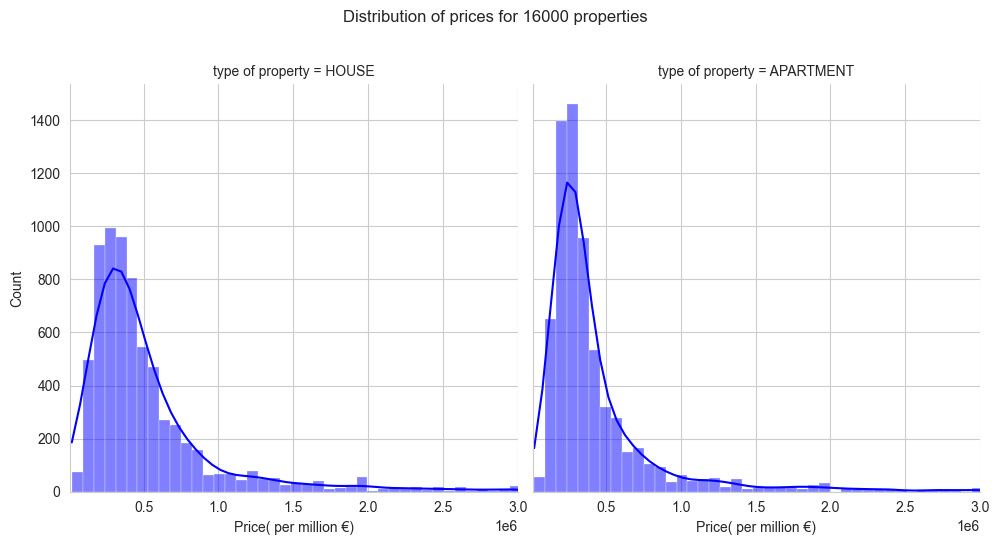

In [198]:
# A full image of the listed price distribution over whole Belgium

# displot is a more versatile function than histplot.
"""By default, if you pass a single variable to displot, it will generate a histogram.\
 However, it can also create other types of plots like kernel density estimate (KDE) plots, rug plots, and more."""
g = sns.displot(data=data, x="price", kde = True,rug = False,bins=150,color="b",col="type of property")
g.set(xlabel = "Price( per million €)")
#by adding y = 1.08, I changed the position of title. if not, there will be overlapping
g.fig.suptitle("Distribution of prices for 16000 properties",y=1.08)
plt.xlim(10000,3000000)
plt.show()

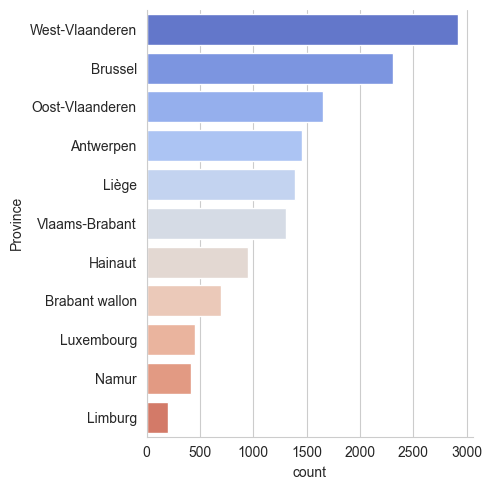

In [199]:
#here we try to see the distribution per province
#list them descending by count
sns.catplot(kind="count",data =data, y="Province",order = data.value_counts("Province").index)
plt.show()

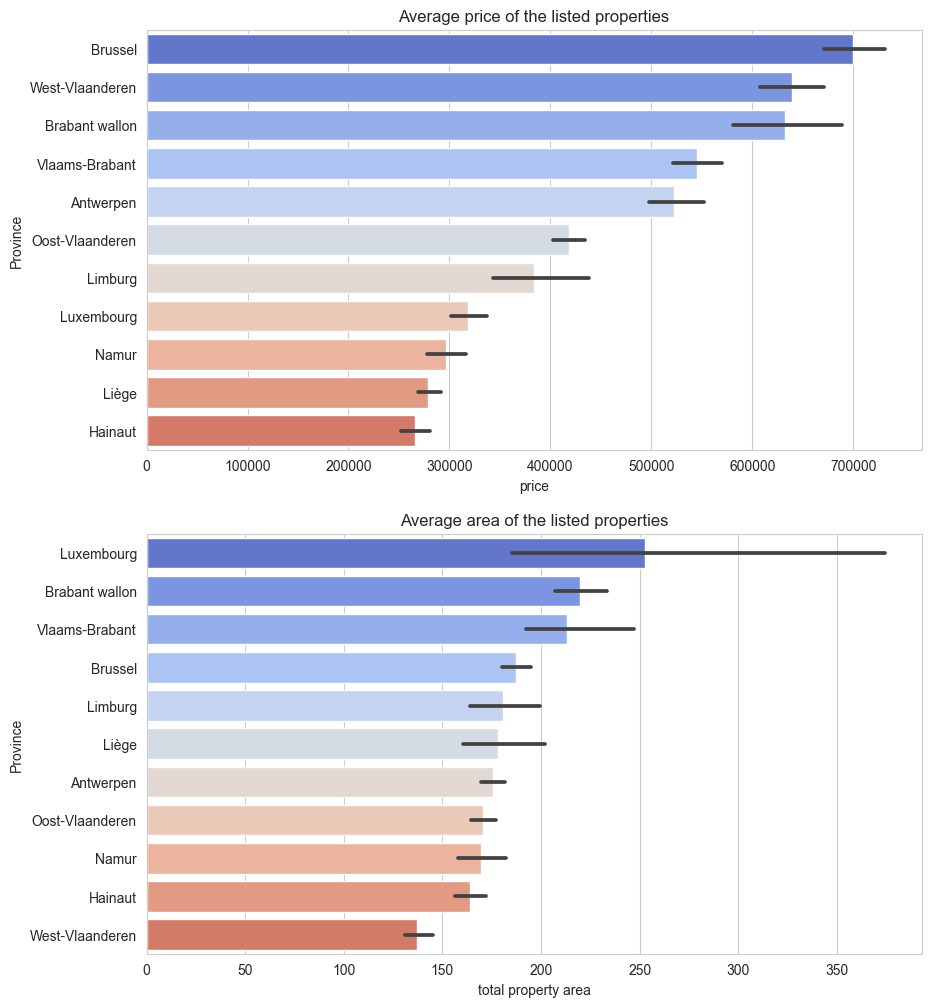

In [200]:
#Let's dive in a bit more, and have a look at the average price and area of the listed properties per province
fig, (ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,12))
sns.barplot(ax=ax0,data=data,x="price",y="Province",order=data.groupby("Province")['price'].mean().sort_values(ascending=False).index)
ax0.set(title="Average price of the listed properties")
sns.barplot(ax=ax1,data=data,x="total property area",y="Province",order=data.groupby("Province")['total property area'].mean().sort_values(ascending=False).index)
ax1.set(title="Average area of the listed properties")
plt.show()

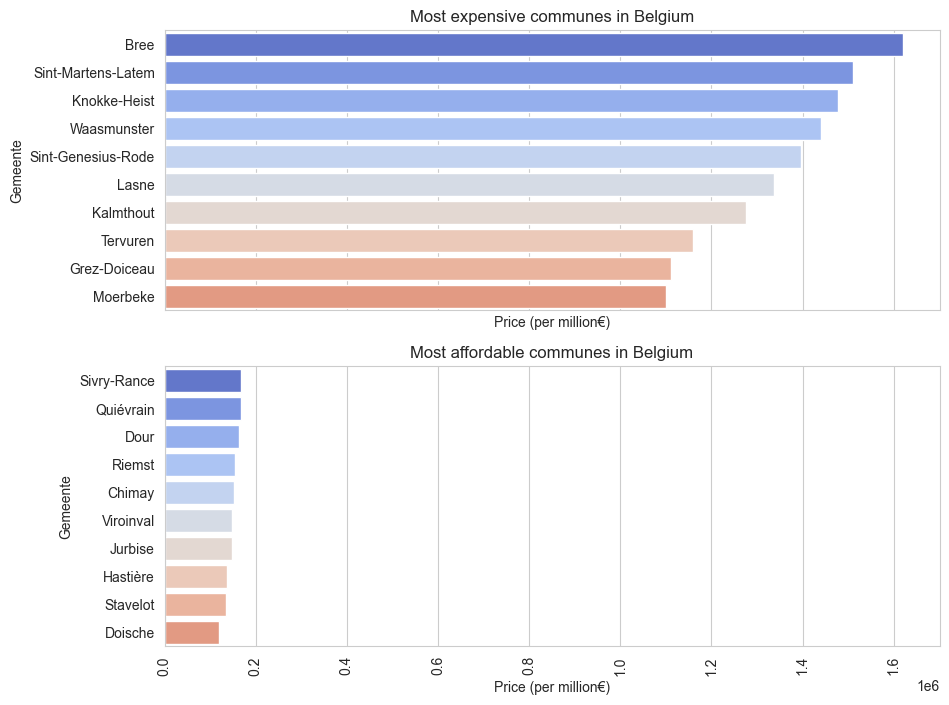

In [224]:
# Let's have a look at the most expensive and cheap communes in Belgium
fig, (ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,8), sharex=True)
top10=data.groupby("Gemeente")["price"].mean().sort_values(ascending=False).head(10)
btm10=data.groupby("Gemeente")["price"].mean().sort_values(ascending=False).tail(10)

sns.barplot(ax=ax0,y=top10.index,x=top10)
ax0.set(title="Most expensive communes in Belgium",xlabel="Price (per million€)")
ax0.tick_params("x",rotation = 90)

sns.barplot(ax=ax1,y=btm10.index,x=btm10)
ax1.set(title="Most affordable communes in Belgium",xlabel="Price (per million€)")
ax1.tick_params("x",rotation = 90)

plt.show()

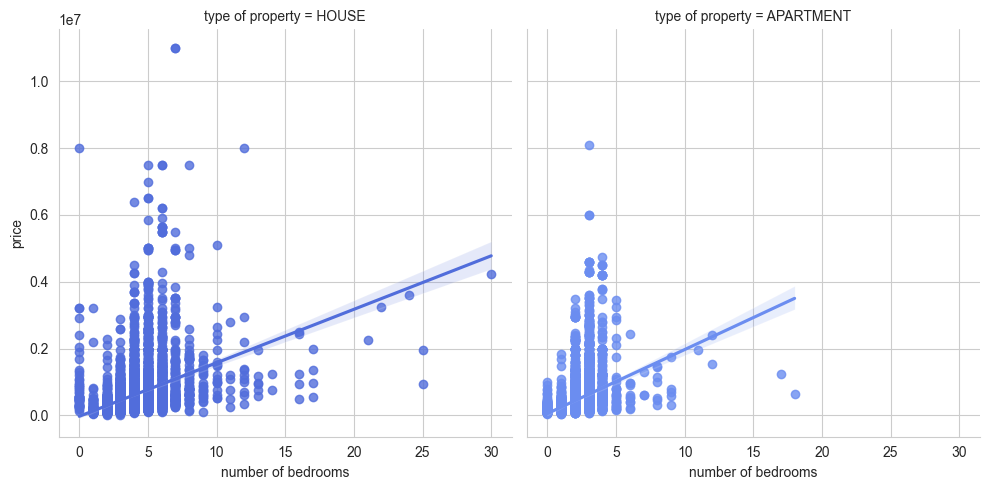

In [201]:
#price linked with bedrooms?
#regression plot
#lmplot :This function combines regplot() and FacetGrid. best for subplots
sns.lmplot(data=data,x="number of bedrooms", y="price",col="type of property",hue="type of property")
plt.show()

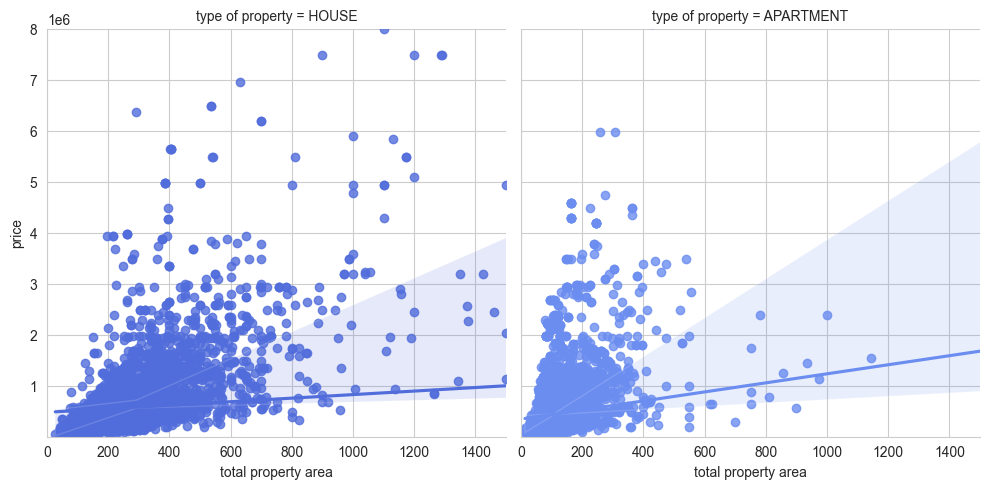

In [202]:
#price linked with living area?
sns.lmplot(data=data,x="total property area", y="price",col="type of property",hue="type of property")
plt.xlim(0,1500)
plt.ylim(10000,8000000)
plt.show()

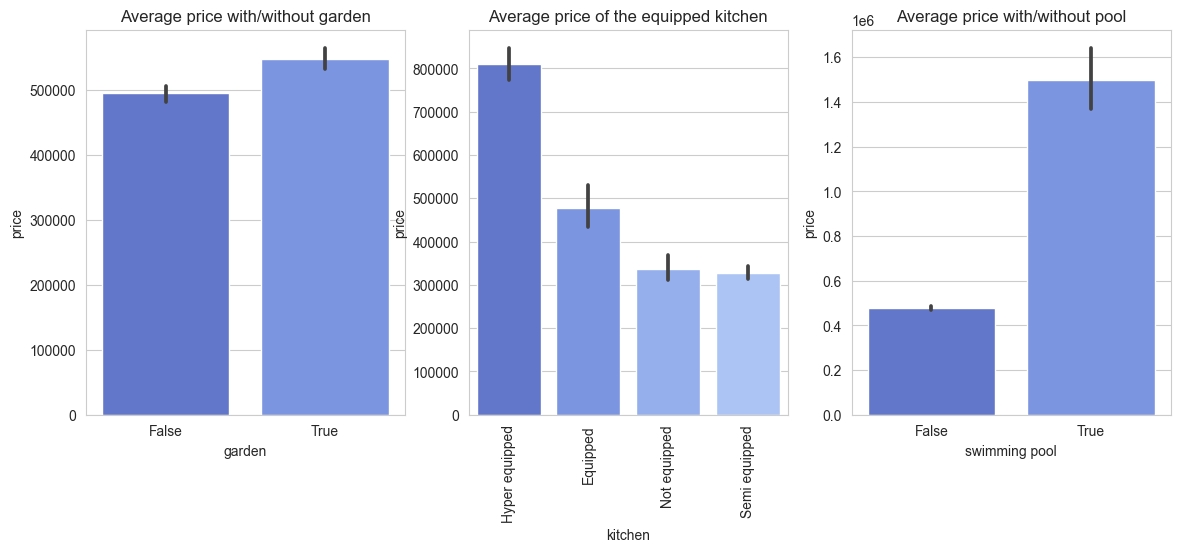

In [217]:
#Price linked with garden? With equiped kitchen? With swimming pool?
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(14,5))

sns.barplot(ax=ax0,data=data,x="garden",y="price")
ax0.set(title="Average price with/without garden")

sns.barplot(ax=ax1,data=data,x="kitchen",y="price",order=data.groupby("kitchen")['price'].mean().sort_values(ascending=False).index)
ax1.set(title="Average price of the equipped kitchen")
ax1.tick_params("x",rotation = 90)

sns.barplot(ax=ax2,data=data,x="swimming pool",y="price")
ax2.set(title="Average price with/without pool")

plt.show()

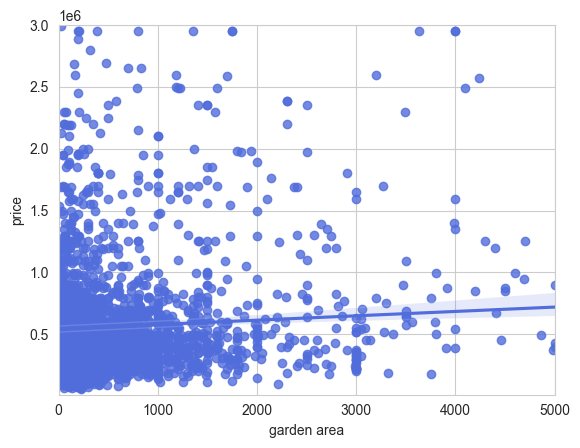

In [204]:
#looks like the properties with gardens tend to have hight mean price.
#let's dive in a little bit to see how garden area effects the price
garden_data = data[(data["garden"]==True) & (data["garden area"] > 0)]
sns.regplot(data=garden_data,x="garden area", y="price" )
plt.xlim(0,5000)
plt.ylim(10000,3000000)
plt.show()